<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Zeel-Gudhka/202218025_Zeel_Gudhka_IDM_CP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Add
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

#Loading the dataset

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/IntroductionToDataMining/deliveries.csv')

In [166]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
data.shape

(17380, 22)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

#Preprocessing and Feature Engineering

In [169]:
data.duplicated().sum()

1

In [170]:
data.drop_duplicates(inplace=True)

In [171]:
missing_value_percentage = (data.isnull().sum() / len(data)) * 100
print(round(missing_value_percentage, 4))

match_id                    0.0000
season                      0.0000
start_date                  0.0000
venue                       0.0000
innings                     0.0000
ball                        0.0000
batting_team                0.0000
bowling_team                0.0000
striker                     0.0000
non_striker                 0.0000
bowler                      0.0000
runs_off_bat                0.0000
extras                      0.0000
wides                      97.5200
noballs                    99.7583
byes                       99.8504
legbyes                    99.3268
penalty                    99.9942
wicket_type                97.1748
player_dismissed           97.1748
other_wicket_type         100.0000
other_player_dismissed    100.0000
dtype: float64


In [172]:
def unique_values_count(data):
  for column in data.columns:
    unique_values = data[column].unique()
    unique_values_without_nan = [value for value in unique_values if pd.notna(value)]
    unique_count = len(unique_values_without_nan)
    print(f"Unique values in '{column}': {unique_count}")

    if unique_count > 0 and unique_count <= 10:
      print(unique_values_without_nan)

In [173]:
unique_values_count(data)

Unique values in 'match_id': 32
Unique values in 'season': 1
['2023/24']
Unique values in 'start_date': 28
Unique values in 'venue': 10
['Narendra Modi Stadium, Ahmedabad', 'Rajiv Gandhi International Stadium, Uppal, Hyderabad', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Arun Jaitley Stadium, Delhi', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Maharashtra Cricket Association Stadium, Pune', 'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai', 'Eden Gardens, Kolkata']
Unique values in 'innings': 2
[1, 2]
Unique values in 'ball': 389
Unique values in 'batting_team': 10
['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan', 'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India']
Unique values in 'bowling_team': 10
['New Zealand', 'England', 'Netherlands', 'Pakistan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'South Africa', 'India', 'Australia']
Unique values in 's

Dropping the columns with either only 1 unique value or no value at all

In [174]:
columns_to_drop = ['season', 'other_wicket_type', 'other_player_dismissed']
data.drop(columns_to_drop, axis=1, inplace=True)

Renaming player_dismissed column as wicket and assigning 1 if there exist any value else 0

In [175]:
data.rename(columns={"player_dismissed": "wicket"}, inplace=True)
data["wicket"] = np.where(data["wicket"].notna(), 1, 0)

Replacing the null values with 0

In [176]:
data[["wides", "noballs", "byes", "legbyes", "penalty"]] = data[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

Replacing the null values with 'no wicket'

In [177]:
data.wicket_type.fillna("no wicket", inplace=True)
data.wicket.fillna("no wicket", inplace=True)

In [178]:
data.isna().sum()

match_id        0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
wides           0
noballs         0
byes            0
legbyes         0
penalty         0
wicket_type     0
wicket          0
dtype: int64

converting the values in ball column to over and balls_left columns

In [179]:
data["ball"] = data["ball"].astype(str)
data[["over", "ball_num"]] = data["ball"].str.split(".", expand=True).astype(int)
data["ball"] = data["ball"].astype(float)
data["over"] = data["over"] + 1
data["balls_left"] = 306 - (data["over"]*6 + data["ball_num"])

Calculating total runs

In [180]:
data["total_runs"] = data["runs_off_bat"] + data["extras"]

Calculating cumulative runs in one inning

In [181]:
data["cumulative_runs"] = data.groupby(["match_id", "innings"])["total_runs"].cumsum()

calculating run rate

In [182]:
data['run_rate'] = data.groupby(["match_id", "innings"]).apply(lambda x: (x['cumulative_runs'] * 6) / (300 - x['balls_left'])).sort_index(level=[0, 1]).values

In [183]:
data.head(3)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,legbyes,penalty,wicket_type,wicket,over,ball_num,balls_left,total_runs,cumulative_runs,run_rate
0,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,0.0,0.0,no wicket,0,1,1,299,0,0,0.0
1,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,0.0,0.0,no wicket,0,1,2,298,6,6,18.0
2,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,0.0,0.0,no wicket,0,1,3,297,1,7,14.0


Creating a result column having values as 0 and 1 depending if the value in wicket_type is nan or notna

In [188]:
specific_values = ['caught', 'bowled', 'caught and bowled', 'lbw', 'run out', 'stumped', 'retired hurt']
specific_values_lower = [value.lower() for value in specific_values]

data['wicket_new'] = data['wicket_type'].astype(str).fillna('').str.strip()
data["result"] = data['wicket_new'].str.lower().isin(specific_values_lower).astype(int)

In [189]:
result_counts = data['result'].value_counts()
print(result_counts)

0    16888
1      491
Name: result, dtype: int64


Calculating target runs for the team in 2nd innings

In [190]:
target_runs = data[data["innings"] == 1].groupby("match_id")["cumulative_runs"].max().reset_index()
target_runs.rename(columns={"cumulative_runs": "target_runs"}, inplace=True)

data = data.merge(target_runs, on="match_id", how="left")

In [191]:
data.loc[data['innings'] == 1, 'target_runs'] = 0
data.loc[data['innings'] == 2, 'target_runs'] += 1

In [192]:
print(data['target_runs'].unique())

[  0 283 287 157 429 200 323 365 345 273 246 192 285 210 289 257 368 263
 400 274 312 383 271 389 230 242 205 358]


In [193]:
data.loc[data['target_runs'] > 0, ['target_runs', 'cumulative_runs', 'balls_left']]

,target_runs,cumulative_runs,balls_left
304,283,4,299
305,283,4,298
306,283,4,297
307,283,6,296
308,283,10,295
...,...,...,...
17374,358,161,91
17375,358,161,90
17376,358,161,89
17377,358,167,88


Calculating required runs and required run rate

In [194]:
mask = data['target_runs'] > 0
print(mask.sum())

data.loc[mask, 'req_runs'] = data.loc[mask, 'target_runs'] - data.loc[mask, 'cumulative_runs']
data.loc[mask, 'req_rr'] = (data.loc[mask, 'req_runs'] * 6) / data.loc[mask, 'balls_left']

print(data.isna().sum())

7887
match_id              0
start_date            0
venue                 0
innings               0
ball                  0
batting_team          0
bowling_team          0
striker               0
non_striker           0
bowler                0
runs_off_bat          0
extras                0
wides                 0
noballs               0
byes                  0
legbyes               0
penalty               0
wicket_type           0
wicket                0
over                  0
ball_num              0
balls_left            0
total_runs            0
cumulative_runs       0
run_rate              0
winner                0
wicket_new            0
result                0
target_runs           0
req_runs           9492
req_rr             9492
dtype: int64


In [195]:
data.fillna(0, inplace=True)

In [196]:
data

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,balls_left,total_runs,cumulative_runs,run_rate,winner,wicket_new,result,target_runs,req_runs,req_rr
0,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,299,0,0,0.000000,New Zealand,no wicket,0,0,0.0,0.000000
1,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,298,6,6,18.000000,New Zealand,no wicket,0,0,0.0,0.000000
2,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,297,1,7,14.000000,New Zealand,no wicket,0,0,0.0,0.000000
3,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,...,296,1,8,12.000000,New Zealand,no wicket,0,0,0.0,0.000000
4,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,...,295,4,12,14.400000,New Zealand,no wicket,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,...,91,0,161,4.622010,South Africa,no wicket,0,358,197.0,12.989011
17375,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,...,90,0,161,4.600000,South Africa,no wicket,0,358,197.0,13.133333
17376,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,...,89,0,161,4.578199,South Africa,no wicket,0,358,197.0,13.280899
17377,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,...,88,6,167,4.726415,South Africa,no wicket,0,358,191.0,13.022727


In [197]:
data.columns

Index(['match_id', 'start_date', 'venue', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'wicket', 'over', 'ball_num', 'balls_left', 'total_runs',
       'cumulative_runs', 'run_rate', 'winner', 'wicket_new', 'result',
       'target_runs', 'req_runs', 'req_rr'],
      dtype='object')

Creating the final dataframe

In [198]:
final_data = data[['batting_team', 'bowling_team', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'balls_left', 'cumulative_runs', 'run_rate',
                   'result', 'target_runs', 'req_runs', 'req_rr']]

In [199]:
final_data

,batting_team,bowling_team,wides,noballs,byes,legbyes,penalty,balls_left,cumulative_runs,run_rate,result,target_runs,req_runs,req_rr
0,England,New Zealand,0.0,0.0,0.0,0.0,0.0,299,0,0.000000,0,0,0.0,0.000000
1,England,New Zealand,0.0,0.0,0.0,0.0,0.0,298,6,18.000000,0,0,0.0,0.000000
2,England,New Zealand,0.0,0.0,0.0,0.0,0.0,297,7,14.000000,0,0,0.0,0.000000
3,England,New Zealand,0.0,0.0,0.0,0.0,0.0,296,8,12.000000,0,0,0.0,0.000000
4,England,New Zealand,0.0,0.0,0.0,0.0,0.0,295,12,14.400000,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,New Zealand,South Africa,0.0,0.0,0.0,0.0,0.0,91,161,4.622010,0,358,197.0,12.989011
17375,New Zealand,South Africa,0.0,0.0,0.0,0.0,0.0,90,161,4.600000,0,358,197.0,13.133333
17376,New Zealand,South Africa,0.0,0.0,0.0,0.0,0.0,89,161,4.578199,0,358,197.0,13.280899
17377,New Zealand,South Africa,0.0,0.0,0.0,0.0,0.0,88,167,4.726415,0,358,191.0,13.022727


In [200]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batting_team     17379 non-null  object 
 1   bowling_team     17379 non-null  object 
 2   wides            17379 non-null  float64
 3   noballs          17379 non-null  float64
 4   byes             17379 non-null  float64
 5   legbyes          17379 non-null  float64
 6   penalty          17379 non-null  float64
 7   balls_left       17379 non-null  int64  
 8   cumulative_runs  17379 non-null  int64  
 9   run_rate         17379 non-null  float64
 10  result           17379 non-null  int64  
 11  target_runs      17379 non-null  int64  
 12  req_runs         17379 non-null  float64
 13  req_rr           17379 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 2.0+ MB


In [201]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
wides,17379.0,0.030381,0.234050,0.0,0.000000,0.000000,0.000000,5.0
noballs,17379.0,0.002417,0.049102,0.0,0.000000,0.000000,0.000000,1.0
byes,17379.0,0.003222,0.099434,0.0,0.000000,0.000000,0.000000,4.0
legbyes,17379.0,0.008343,0.117956,0.0,0.000000,0.000000,0.000000,4.0
penalty,17379.0,0.000288,0.037928,0.0,0.000000,0.000000,0.000000,5.0
balls_left,17379.0,163.294378,81.844602,-1.0,97.000000,167.000000,234.000000,299.0
cumulative_runs,17379.0,124.783647,83.845391,0.0,56.000000,115.000000,181.000000,428.0
run_rate,17379.0,5.328607,1.660382,0.0,4.421053,5.195122,6.150000,48.0
result,17379.0,0.028252,0.165698,0.0,0.000000,0.000000,0.000000,1.0
target_runs,17379.0,131.148973,151.162853,0.0,0.000000,0.000000,273.000000,429.0


Removing inf value in required run rate

In [202]:
print("Maximum req_rr value:", final_data['req_rr'].max())
print("Minimum req_rr value:", final_data['req_rr'].min())

Maximum req_rr value: inf
Minimum req_rr value: -36.0


In [203]:
final_data = final_data[~(final_data.req_rr > 500)]

In [204]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
wides,17378.0,0.030383,0.234057,0.0,0.000000,0.000000,0.000000,5.0
noballs,17378.0,0.002417,0.049103,0.0,0.000000,0.000000,0.000000,1.0
byes,17378.0,0.003222,0.099437,0.0,0.000000,0.000000,0.000000,4.0
legbyes,17378.0,0.008344,0.117959,0.0,0.000000,0.000000,0.000000,4.0
penalty,17378.0,0.000288,0.037929,0.0,0.000000,0.000000,0.000000,5.0
balls_left,17378.0,163.303775,81.837582,-1.0,97.000000,167.000000,234.000000,299.0
cumulative_runs,17378.0,124.768788,83.824918,0.0,56.000000,115.000000,181.000000,428.0
run_rate,17378.0,5.328473,1.660335,0.0,4.421053,5.194964,6.150000,48.0
result,17378.0,0.028197,0.165539,0.0,0.000000,0.000000,0.000000,1.0
target_runs,17378.0,131.134135,151.154546,0.0,0.000000,0.000000,273.000000,429.0


In [205]:
final_data.shape

(17378, 14)

In [206]:
final_data.columns

Index(['batting_team', 'bowling_team', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'balls_left', 'cumulative_runs', 'run_rate', 'result',
       'target_runs', 'req_runs', 'req_rr'],
      dtype='object')

#ML (Over Sampling)

In [1826]:
X = final_data.drop('result', axis=1)
y = final_data['result']

In [1827]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [1828]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [1829]:
one_hot_cols = ['bowling_team', 'batting_team']
std_scale_cols = ['balls_left', 'cumulative_runs', 'run_rate', 'target_runs', 'req_runs', 'req_rr']

In [1830]:
ct = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(sparse=False, drop="first"), one_hot_cols),
    ('scaler', StandardScaler(), std_scale_cols)
])

###Random Forest Classifier

In [1831]:
pipe_rf = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [1832]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__min_samples_leaf': [1, 2, 4],
}

In [1833]:
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['bowling_team',
                                                                          'batting_team']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['balls_left',
                                                                          'cumulative_runs',
                                                                          'run_rate',
                                                                          'target_runs',
                                                                          'req_runs',
                                                                          'req_rr'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [1834]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.9836183039214369


In [1835]:
val_accuracy_rf = grid_search_rf.score(X_val, y_val)
print("Random Forest Validation set accuracy:", val_accuracy_rf)

test_accuracy_rf = grid_search_rf.score(X_test, y_test)
print("Random Forest Test set accuracy:", test_accuracy_rf)

Random Forest Validation set accuracy: 0.950517836593786
Random Forest Test set accuracy: 0.9432297660145761


In [1836]:
y_pred_rf = grid_search_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2535
           1       0.05      0.06      0.05        72

    accuracy                           0.94      2607
   macro avg       0.51      0.51      0.51      2607
weighted avg       0.95      0.94      0.95      2607



###Logistic Regression

In [1837]:
pipe_lr = Pipeline([
    ('transformer', ct),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

In [1838]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [1839]:
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['bowling_team',
                                                                          'batting_team']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['balls_left',
                                                                          'cumulative_runs',
                                                                          'run_rate',
                                                                          'target_runs',
                                                                          'req_runs',
                                                                          'req_rr'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [1840]:
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best cross-validation accuracy for Logistic Regression: 0.6085340196855862


In [1841]:
val_accuracy_lr = grid_search_lr.score(X_val, y_val)
print("Logistic Regression Validation set accuracy:", val_accuracy_lr)

test_accuracy_lr = grid_search_lr.score(X_test, y_test)
print("Logistic Regression Test set accuracy:", test_accuracy_lr)

Logistic Regression Validation set accuracy: 0.6148830072880705
Logistic Regression Test set accuracy: 0.6133486766398158


In [1842]:
y_pred_lr = grid_search_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      2535
           1       0.05      0.65      0.09        72

    accuracy                           0.61      2607
   macro avg       0.51      0.63      0.42      2607
weighted avg       0.96      0.61      0.74      2607



###Conclusion:
Oversampling has significantly improved the model's performance, providing high accuracy on both validation and test sets. Random Forest models often benefit from balanced class distribution.

#ML (Under Sampling)

In [2432]:
X = final_data.drop('result', axis=1)
y = final_data['result']

In [2433]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2434]:
one_hot_cols = ['bowling_team', 'batting_team']
std_scale_cols = ['balls_left', 'cumulative_runs', 'run_rate', 'target_runs', 'req_runs', 'req_rr']

In [2435]:
ct = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(sparse=False, drop="first"), one_hot_cols),
    ('scaler', StandardScaler(), std_scale_cols)
])

In [2436]:
under_sampler_rf = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [2437]:
X_train_resampled, y_train_resampled = under_sampler_rf.fit_resample(X_train, y_train)

In [2438]:
pipe_rf = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [2439]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__min_samples_leaf': [1, 2, 4],
}

In [2440]:
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['bowling_team',
                                                                          'batting_team']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['balls_left',
                                                                          'cumulative_runs',
                                                                          'run_rate',
                                                                          'target_runs',
                                                                          'req_runs',
                                                                          'req_rr'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [2441]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.5696352583586626


In [2442]:
val_accuracy_rf = grid_search_rf.score(X_val, y_val)
print("Random Forest Validation set accuracy:", val_accuracy_rf)

test_accuracy_rf = grid_search_rf.score(X_test, y_test)
print("Random Forest Test set accuracy:", test_accuracy_rf)

Random Forest Validation set accuracy: 0.5550441120061373
Random Forest Test set accuracy: 0.5596471039509014


In [2443]:
y_pred_rf = grid_search_rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      2535
           1       0.04      0.69      0.08        72

    accuracy                           0.56      2607
   macro avg       0.51      0.63      0.40      2607
weighted avg       0.96      0.56      0.69      2607



##Logistic Regression

In [2444]:
under_sampler_lr = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [2445]:
X_train_resampled, y_train_resampled = under_sampler_lr.fit_resample(X_train, y_train)

In [2446]:
pipe_lr = Pipeline([
    ('transformer', ct),
    ('classifier', LogisticRegression(random_state=42))
])

In [2447]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [2448]:
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['bowling_team',
                                                                          'batting_team']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['balls_left',
                                                                          'cumulative_runs',
                                                                          'run_rate',
                                                                          'target_runs',
                                                                          'req_runs',
                                                                          'req_rr'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [2449]:
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best cross-validation accuracy for Logistic Regression: 0.5881053698074974


In [2450]:
val_accuracy_lr = grid_search_lr.score(X_val, y_val)
print("Logistic Regression Validation set accuracy:", val_accuracy_lr)

test_accuracy_lr = grid_search_lr.score(X_test, y_test)
print("Logistic Regression Test set accuracy:", test_accuracy_lr)

Logistic Regression Validation set accuracy: 0.5772919064058305
Logistic Regression Test set accuracy: 0.587265055619486


In [2451]:
y_pred_lr = grid_search_lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      2535
           1       0.05      0.69      0.09        72

    accuracy                           0.59      2607
   macro avg       0.52      0.64      0.41      2607
weighted avg       0.96      0.59      0.72      2607



###Conclusion:
Undersampling seems to have negatively impacted the performance of the Random Forest model, likely due to the loss of information from the majority class. It might be challenging for the model to generalize well with such a small representation of the majority class.

#Deep Learning (Sequential Method)

In [2741]:
X = final_data.drop('result', axis=1)
y = final_data['result']

In [2742]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2743]:
one_hot_cols = ['bowling_team', 'batting_team']
std_scale_cols = ['balls_left', 'cumulative_runs', 'run_rate', 'target_runs', 'req_runs', 'req_rr']

In [2744]:
ct = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(sparse=False, drop="first"), one_hot_cols),
    ('scaler', StandardScaler(), std_scale_cols)
])

In [2745]:
X_train_transformed = ct.fit_transform(X_train)

In [2746]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_transformed, y_train)

X_val_transformed = ct.transform(X_val)

In [2646]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [2647]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [2652]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_val_transformed, y_val), callbacks=[early_stopping])

Epoch 1/20
739/739 [==============================] - 3s 4ms/step - loss: 0.4481 - accuracy: 0.7773 - val_loss: 0.5771 - val_accuracy: 0.6352
Epoch 2/20
739/739 [==============================] - 4s 5ms/step - loss: 0.4336 - accuracy: 0.7878 - val_loss: 0.5419 - val_accuracy: 0.6866
Epoch 3/20
739/739 [==============================] - 3s 4ms/step - loss: 0.4233 - accuracy: 0.7941 - val_loss: 0.5634 - val_accuracy: 0.6743
Epoch 4/20
739/739 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8024 - val_loss: 0.6113 - val_accuracy: 0.6563
Epoch 5/20
739/739 [==============================] - 2s 3ms/step - loss: 0.4054 - accuracy: 0.8054 - val_loss: 0.6027 - val_accuracy: 0.6636
Epoch 6/20
739/739 [==============================] - 2s 3ms/step - loss: 0.3981 - accuracy: 0.8108 - val_loss: 0.5843 - val_accuracy: 0.6901
Epoch 7/20
739/739 [==============================] - 3s 5ms/step - loss: 0.3868 - accuracy: 0.8174 - val_loss: 0.5839 - val_accuracy: 0.6912


In [2653]:
X_test_transformed = ct.transform(X_test)

y_pred = model.predict(X_test_transformed)
y_pred_binary = np.round(y_pred).flatten()

y_test_array = y_test.values.flatten()

accuracy = np.sum(y_pred_binary == y_test_array) / len(y_test_array)
print(f"Test set accuracy: {accuracy:.4f}")

82/82 [==============================] - 0s 3ms/step
Test set accuracy: 0.6878


###Conclusion:
The deep learning model using the Sequential API, with early stopping, achieved moderate accuracy. This approach might require further tuning or exploration of different architectures to improve performance.

#Deep Learning (Functional API Method)

In [213]:
X = final_data.drop('result', axis=1)
y = final_data['result']

In [214]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [215]:
one_hot_cols = ['bowling_team', 'batting_team']
std_scale_cols = ['balls_left', 'cumulative_runs', 'run_rate', 'target_runs', 'req_runs', 'req_rr']

In [216]:
encoder = OneHotEncoder(sparse=False, drop="first")
X_train_encoded = encoder.fit_transform(X_train[one_hot_cols])
X_val_encoded = encoder.transform(X_val[one_hot_cols])
X_test_encoded = encoder.transform(X_test[one_hot_cols])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[std_scale_cols])
X_val_scaled = scaler.transform(X_val[std_scale_cols])
X_test_scaled = scaler.transform(X_test[std_scale_cols])

X_train_transformed = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
X_val_transformed = np.concatenate([X_val_encoded, X_val_scaled], axis=1)
X_test_transformed = np.concatenate([X_test_encoded, X_test_scaled], axis=1)

In [217]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_transformed, y_train)

In [218]:
y_train_binary = np.asarray(y_train_resampled).astype('float32')
y_val_binary = np.asarray(y_val).astype('float32')
y_test_binary = np.asarray(y_test).astype('float32')

In [221]:
inputs = keras.Input(shape=(X_train_resampled.shape[1],))

x = layers.Dense(64, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x_shortcut = layers.Dense(128, activation='relu')(inputs)
x_shortcut = layers.BatchNormalization()(x_shortcut)
x = layers.Add()([x, x_shortcut])
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x_shortcut = layers.Dense(64, activation='relu')(inputs)
x_shortcut = layers.BatchNormalization()(x_shortcut)
x = layers.Add()([x, x_shortcut])
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=output)

In [222]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [223]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_resampled, y_train_binary,
    epochs=20, batch_size=32,
    validation_data=(X_val_transformed, y_val_binary),
    callbacks=[early_stopping]
)

Epoch 1/20
739/739 [==============================] - 8s 6ms/step - loss: 0.6189 - accuracy: 0.6527 - val_loss: 0.6368 - val_accuracy: 0.6099
Epoch 2/20
739/739 [==============================] - 6s 8ms/step - loss: 0.5710 - accuracy: 0.6944 - val_loss: 0.6280 - val_accuracy: 0.6087
Epoch 3/20
739/739 [==============================] - 5s 7ms/step - loss: 0.5500 - accuracy: 0.7076 - val_loss: 0.5864 - val_accuracy: 0.6417
Epoch 4/20
739/739 [==============================] - 5s 6ms/step - loss: 0.5335 - accuracy: 0.7172 - val_loss: 0.5545 - val_accuracy: 0.6617
Epoch 5/20
739/739 [==============================] - 7s 10ms/step - loss: 0.5180 - accuracy: 0.7318 - val_loss: 0.5911 - val_accuracy: 0.6456
Epoch 6/20
739/739 [==============================] - 6s 8ms/step - loss: 0.5072 - accuracy: 0.7359 - val_loss: 0.6196 - val_accuracy: 0.6068
Epoch 7/20
739/739 [==============================] - 4s 5ms/step - loss: 0.4991 - accuracy: 0.7399 - val_loss: 0.5371 - val_accuracy: 0.6640
Epoch

In [224]:
val_loss, val_accuracy = model.evaluate(X_val_transformed, y_val_binary, verbose=0)
print(f"\nValidation Accuracy: {val_accuracy}")

test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test_binary, verbose=0)
print(f"\nTest Accuracy: {test_accuracy}")


Validation Accuracy: 0.7065592408180237

Test Accuracy: 0.7107786536216736


In [225]:
y_test_pred_prob = model.predict(X_test_transformed)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

test_conf_matrix = confusion_matrix(y_test_binary, y_test_pred)
print("\nTest Confusion Matrix:")
test_conf_matrix

82/82 [==============================] - 0s 2ms/step

Test Confusion Matrix:


array([[1820,  715],
       [  39,   33]])

In [226]:
print("\nClassification Report:")
classification_report(y_test_binary, y_test_pred)


Classification Report:


'              precision    recall  f1-score   support\n\n         0.0       0.98      0.72      0.83      2535\n         1.0       0.04      0.46      0.08        72\n\n    accuracy                           0.71      2607\n   macro avg       0.51      0.59      0.45      2607\nweighted avg       0.95      0.71      0.81      2607\n'

In [227]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

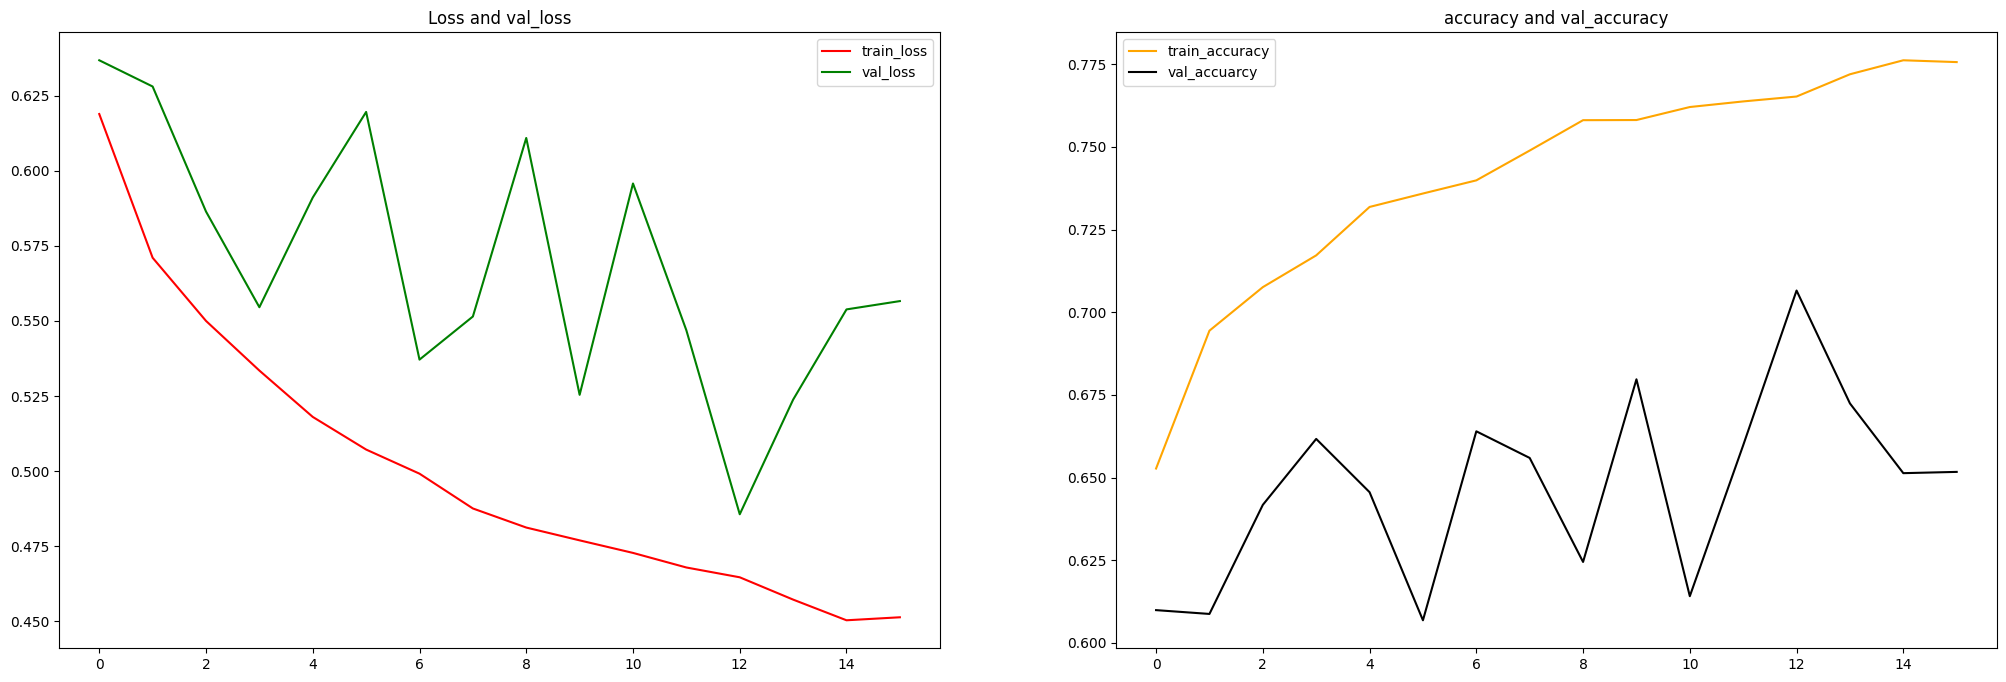

In [228]:
plot_function(history)

###Conclusion:
The model built using the Functional API, incorporating batch normalization and skip connections, has shown improvement over the Sequential model. This suggests that a more complex architecture with skip connections may capture more intricate patterns in the data.

##Overall Conclusion:

Oversampling vs. Undersampling: Oversampling performed better than undersampling. Oversampling helps address class imbalance, allowing the model to learn more effectively from minority class samples.


Deep Learning vs. Machine Learning: Deep learning models, with appropriate architecture and techniques (like skip connections), have the potential to outperform traditional machine learning models like Random Forest, especially in scenarios with complex relationships.